# **Predicting Customer Churn in Telecommunications: A Data-Driven Approach to Enhancing Retention Strategies at SyriaTel**


# **Business Overview**

SyriaTel is a leading telecommunications company providing a range of services including voice, data, and internet to its customers. In the highly competitive telecommunications industry, customer retention is crucial for sustaining revenue and profitability.SyriaTel faces a significant challenge with customer churn—customers discontinuing their services—which impacts its revenue and growth. High churn rates can be costly, leading to lost revenue and increased costs associated with acquiring new customers. To maintain a competitive edge and ensure business stability, SyriaTel needs to effectively manage and reduce churn.






# **Stakeholders**

SyriaTel: The primary focus of the project is to predict customer churn to reduce costs and improve customer retention.

1. SyriaTel Marketing: Wants to understand why customers are leaving and how to improve retention.
2. SyriaTel Sales: Wants to understand why customers are leaving and how to improve retention.
3. SyriaTel Customer Service: Wants to understand why customers are leaving and how to improve retention.   
4. SyriaTel Finance: Wants to understand why customers are leaving and how to improve retention.



# **Business Understanding**

SyriaTel, a telecommunications company, experiences a significant loss of revenue due to customers who discontinue their services. By accurately predicting which customers are likely to churn, the company can implement targeted retention strategies, improve customer satisfaction, and ultimately reduce the churn rate. Understanding the patterns and factors leading to churn can provide actionable insights for improving customer loyalty and operational efficiency.

# **Data Description:**  

The dataset contains various customer-related attributes, including usage metrics and service plan details. Key variables include:   

`State:` The customer's location, represented as a categorical variable.  
`Account Length:` Duration of the customer's account in days.  
`Area Code:` Numeric representation of the customer's area code.  
`International Plan:` Whether the customer has subscribed to an international calling plan.  
`Voice Mail Plan:` Subscription status to a voicemail plan.  
`Total Day/Eve/Night/Intl Minutes:` Usage minutes during different time segments.  
`Total Day/Eve/Night/Intl Calls:` Call counts across different time segments.  
`Total Day/Eve/Night/Intl Charge:` Charges accrued in different time segments.  
`Customer Service Calls:` Number of calls made to customer service.  
`Churn:` The target variable indicating whether the customer has churned (True/False).  


# **Problem Statement**

SyriaTel wants to predict customer churn to proactively address customer retention. The goal is to build a classification model that can accurately predict whether a customer will stop doing business with SyriaTel. This involves identifying the factors contributing to churn and using them to predict future churn events.

# **Objective**

Identify the factors contributing to churn, build a predictive model to predict churn, and provide actionable insights to SyriaTel.

Steps to achieve this objective:

Data Exploration: Gain insights into the data by exploring various aspects such as data types, missing values, and summary statistics.

Data Preprocessing: Handle missing values, outliers, and categorical variables appropriately. This may involve imputation, encoding, or scaling the data.

Feature Engineering: Create new features that may help improve the predictive model's performance. This may involve combining existing features, creating interaction terms, or transforming data to better represent the relationships between variables.

Model Selection: Choose an appropriate classification model for predicting customer churn, such as logistic regression, decision trees, or random forests.

Build a Predictive Model: Develop and train a classification model to predict the likelihood of customer churn based on available features.

Identify Key Predictors: Analyze the model to identify which features are most influential in predicting churn.

Evaluate Model Performance: Assess the model using metrics such as accuracy, precision, recall, and F1 score to ensure it meets the required performance standards.

Present Results: Summarize the findings and insights gained from the model, including the most influential features and their impact on customer churn.

Provide Actionable Insights: Offer recommendations to SyriaTel on how to address the factors leading to churn and improve customer retention strategies.

Evaluate Model Performance: Assess the model using metrics such as accuracy, precision, recall, and ROC-AUC to ensure it meets the required performance standards.

In [ ]:
# Start by importing all the necessary libraries fot our project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In a dataframe name "tmdb_df" load "tmdb.movies.csv" file in the cell below using "pd.read_csv" format

# 1. Data Overview
    
1.1. Load and Inspect the Data

In a dataframe name "df" load "bigml_59c28831336c6604c800002a.csv" file in the cell below using "pd.read_csv" format



In [133]:
df = pd.read_csv("Data/bigml_59c28831336c6604c800002a.csv")
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Now lets get familiar with the data we have in our df. This step will include
1. Understanding the dimentionality of our dataset
2. Investigating what type of data it contains, and the data types used to store it
3. Dicovering how missing values are encoded, and how many there are
4. Getting a feel for what information it does and doesn't contain

1.2 In the cell below,lets inspect the info printout of the dataframe

In [182]:
col_names = df.columns
col_names

Index(['state', 'account length', 'area code', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'churn'],
      dtype='object')

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

The info() printout has provided us with a summary of our dataset, revealing key details about its structure and contents. Here's a brief explanation:

Number of Entries: The dataset contains 3,333 rows, indicating the number of records available for analysis.

Number of Columns: There are 21 columns, which include both features and the target variable (churn).

Data Types:

8 integer columns (int64): These likely represent counts or other discrete values (e.g., account length, number vmail messages).

8 float columns (float64): These are continuous numerical features (e.g., total day minutes, total day charge).

4 object columns (object): These are categorical variables (e.g., state, phone number, international plan).

One column (customer_id): This is a unique identifier for each customer.

1 boolean column (bool): The churn column, indicating whether a customer churned (True) or not (False).

Non-Null Counts: All columns have 3,333 non-null entries, meaning there are no missing values in the dataset.




1.3. We look for shape of our dataframe

In [135]:
df.shape

(3333, 21)

The shape (3333, 21) tells us that our dataset contains 3,333 records, with 21 features for each record. This is a key piece of information for understanding the size and complexity of the data we're working with.

1.4. Summary Statistics

We now get a summary of numerical features .

In [136]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


The describe() function provides a summary of the numerical features in the dataset. It includes key statistics such as count, mean, standard deviation, minimum, 25th percentile, 50th percentile (median), 75th percentile, and maximum values. This can help us identify any outliers or skewness in the data.

    

1.5. Identify Missing Values: Check for missing values using isnull().sum().

In [137]:
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

It looks like there are no missing values in our dataset.

1.6. Data Types

Ensure that each column has the correct data type. Convert if necessary.

In [138]:
df.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

1.7. Unique Values

Inspect unique values in categorical columns to ensure there are no anomalies.

In [139]:
for column in df.select_dtypes(include=['object']).columns:
    print(f'{column} unique values: {df[column].unique()}')

state unique values: ['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']
phone number unique values: ['382-4657' '371-7191' '358-1921' ... '328-8230' '364-6381' '400-4344']
international plan unique values: ['no' 'yes']
voice mail plan unique values: ['yes' 'no']


1. state Column
Unique Values: The state column has a variety of state abbreviations, which seems normal.

Action: Convert the state column into numerical format using one-hot encoding. This will create a binary column for each state, allowing the model to utilize this categorical information effectively.

2. phone number Column
Unique Values: The phone number column has unique values for each entry.

Action: This column should be dropped because it doesn't provide useful information for predicting churn and might add noise to the model.

3. international plan Column
Unique Values: The international plan column has two values: 'no' and 'yes'.

Action: Encode this binary categorical feature using binary encoding (0 and 1). This can be done with label encoding or one-hot encoding.

4. voice mail plan Column
Unique Values: The voice mail plan column also has two values: 'yes' and 'no'.

Action: Similar to the international plan, encode this binary categorical feature using binary encoding (0 and 1).

In [140]:
# Drop the 'phone number' column as it's not needed
df = df.drop(columns=['phone number'])

1.8. Categorical Features

Use bar plots to show the distribution of categories.

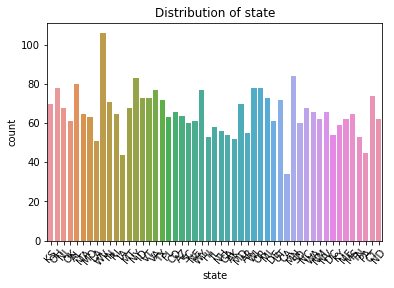

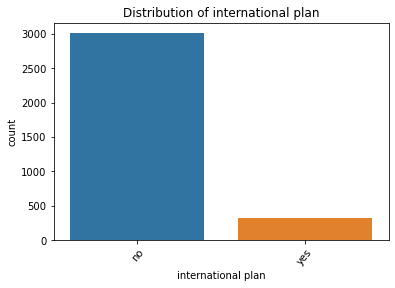

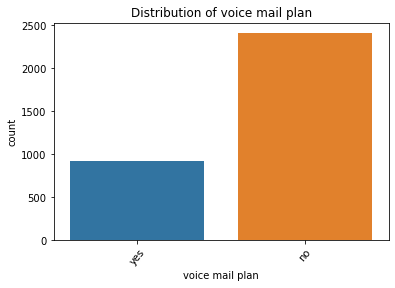

In [141]:
for column in df.select_dtypes(include=['object']).columns:
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=50)
    plt.show()

1.2. Overview of Categorical Features

Check the distribution of categorical features.

In [142]:
# Define categorical features
categorical_features = ['state', 'international plan', 'voice mail plan']

# Count frequency of each category in categorical features
for feature in categorical_features:
    frequency = df[feature].value_counts()
    print(f"Distribution of {feature}:")
    print(frequency)
    print()

Distribution of state:
WV    106
MN     84
NY     83
AL     80
WI     78
OH     78
OR     78
VA     77
WY     77
CT     74
MI     73
ID     73
VT     73
TX     72
UT     72
IN     71
KS     70
MD     70
NJ     68
MT     68
NC     68
CO     66
WA     66
NV     66
RI     65
MS     65
MA     65
AZ     64
FL     63
MO     63
ME     62
ND     62
NM     62
OK     61
NE     61
DE     61
SD     60
SC     60
KY     59
IL     58
NH     56
AR     55
DC     54
GA     54
TN     53
HI     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64

Distribution of international plan:
no     3010
yes     323
Name: international plan, dtype: int64

Distribution of voice mail plan:
no     2411
yes     922
Name: voice mail plan, dtype: int64



In [143]:
# print number of labels in International variable

print('International plan contains', len(df['international plan'].unique()), 'labels')

International plan contains 2 labels


In [144]:
# check frequency distribution of values in internatioal plan variable

df['international plan'].value_counts()

no     3010
yes     323
Name: international plan, dtype: int64

In [145]:
# check frequency distribution of values in voice mail plan variable

df['voice mail plan'].value_counts()

no     2411
yes     922
Name: voice mail plan, dtype: int64

The distribution results for our categorical features are as follows:

1. Distribution of state
The state column has a fairly balanced distribution with some states having slightly higher counts:

Most Common:
WV (106)
MN (84)
NY (83)
Least Common:
CA (34)
The distribution seems reasonable, though some states are more common than others. This is normal and reflects the geographical spread of our customer base.

2. Distribution of international plan
The distribution for the international plan feature shows:

No: 3010
Yes: 323
This indicates a strong imbalance with a significantly larger proportion of customers not having an international plan.

3. Distribution of voice mail plan
The distribution for the voice mail plan feature shows:

No: 2411
Yes: 922
This also indicates a noticeable imbalance, though not as extreme as the international plan.

# Calculate Imbalance Ratios

Compute the ratio of the majority class to the minority class. A high ratio indicates significant imbalance.

In [146]:
# Calculate imbalance ratios for each categorical feature
for feature in categorical_features:
    counts = df[feature].value_counts()
    imbalance_ratio = counts.max() / counts.min()
    print(f"Imbalance ratio for {feature}: {imbalance_ratio}")

Imbalance ratio for state: 3.1176470588235294
Imbalance ratio for international plan: 9.318885448916408
Imbalance ratio for voice mail plan: 2.6149674620390457


Imbalance Ratios Interpretation
state: 3.12

This ratio suggests a moderate level of imbalance among the states. Some states have significantly more entries compared to others. While not extreme, it's worth considering if certain states are overrepresented or underrepresented.

international plan: 9.32

This indicates a high imbalance between 'yes' and 'no' categories. 'No' is vastly more common than 'yes'. This can impact model performance, as models may become biased towards the majority class.

voice mail plan: 2.61

This ratio indicates a moderate imbalance, with 'no' being more common than 'yes'. While less severe than the international plan, it still suggests that 'no' is more prevalent.

1.3. Churn Distribution

Examine the distribution of the target variable (churn).

In [147]:
print(df['churn'].value_counts())

False    2850
True      483
Name: churn, dtype: int64


2. Data Preprocessing
   
   2.1. Convert Categorical Variables

Convert categorical features to numerical using one-hot encoding.

In [148]:
#df = pd.get_dummies(df, columns=['state', 'international plan', 'voice mail plan'], drop_first=True)

# 2. Now that we have looked at the categorical features lets look at the numerical features.

Distribution Plots: Use histograms  plots to visualize the distribution of each numeric feature.

2.1. Handling Outliers

Boxplots: Identify outliers using boxplots.

1. Define X and y

X: This should include all our feature columns (numeric and categorical).

y: This is our target variable (churn).

In [149]:
# Features`
X = df.drop(columns=['churn'])  
#Target variable (churn)
y = df['churn']  

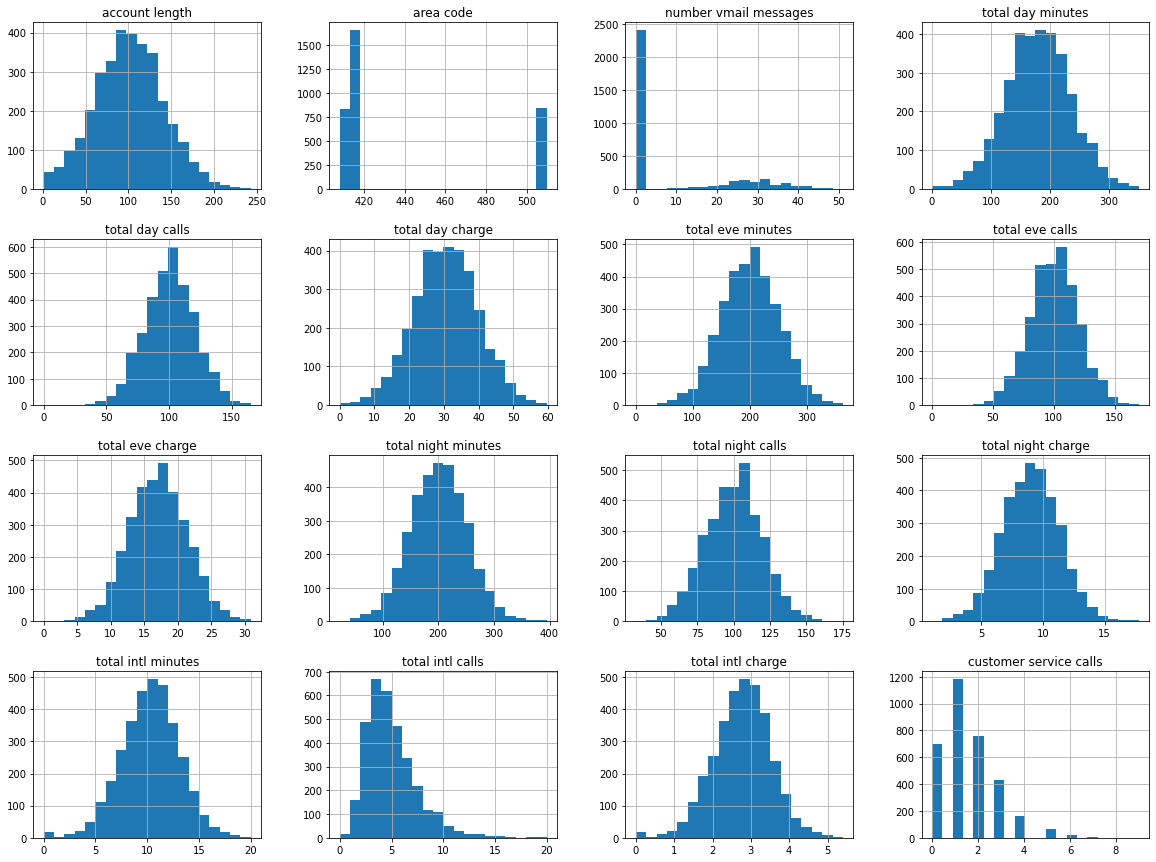

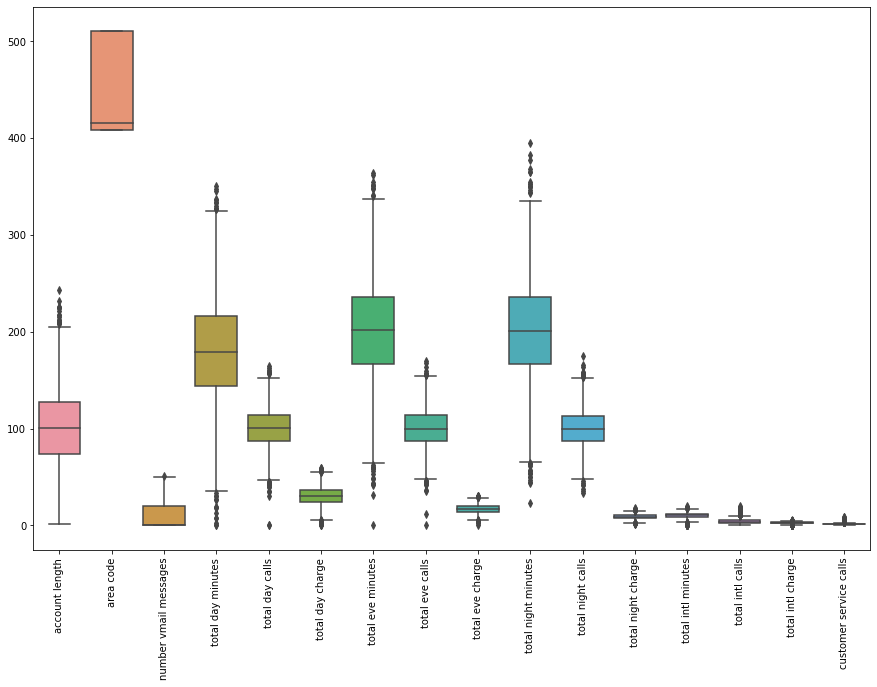

In [150]:
# Histograms
X.hist(bins=20, figsize=(20, 15))
plt.show()

# Boxplots
plt.figure(figsize=(15, 10))
sns.boxplot(data=X)
plt.xticks(rotation=90)
plt.show()

# Handling the outlier values for the boxplot data structure and skewed distribution 

In [151]:
# IQR Method
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1

# Define outliers
outliers = (X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))

# Print outliers
print(outliers.sum())  # Count of outliers in each feature

account length             18
area code                   0
customer service calls    267
international plan          0
number vmail messages       1
state                       0
total day calls            23
total day charge           25
total day minutes          25
total eve calls            20
total eve charge           24
total eve minutes          24
total intl calls           78
total intl charge          49
total intl minutes         46
total night calls          22
total night charge         30
total night minutes        30
voice mail plan             0
dtype: int64


In [152]:
from scipy.stats import zscore

def handle_normal_outliers(df, columns):
    for column in columns:
        df[f'{column}_zscore'] = zscore(df[column])
        outliers = df[(df[f'{column}_zscore'] > 3) | (df[f'{column}_zscore'] < -3)]
        print(f'{column} has {len(outliers)} outliers.')

        # Optionally remove or cap outliers
        # df = df[(df[f'{column}_zscore'] <= 3) & (df[f'{column}_zscore'] >= -3)]
        # Alternatively, cap outliers:
        # df[column] = df[column].clip(lower=df[column].quantile(0.01), upper=df[column].quantile(0.99))

    return df.drop([f'{column}_zscore' for column in columns], axis=1)

normal_columns = [
    'account length', 'total day minutes', 'total day calls', 'total day charge', 
    'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 
    'total night calls', 'total night charge', 'total intl minutes', 'total intl charge'
]

df = handle_normal_outliers(df, normal_columns)


account length has 7 outliers.
total day minutes has 9 outliers.
total day calls has 9 outliers.
total day charge has 9 outliers.
total eve minutes has 9 outliers.
total eve calls has 7 outliers.
total eve charge has 9 outliers.
total night minutes has 11 outliers.
total night calls has 6 outliers.
total night charge has 11 outliers.
total intl minutes has 22 outliers.
total intl charge has 22 outliers.


In [153]:
from scipy.stats import zscore

class NormalOutlierDetector:
    def __init__(self, dataframe):
        self.dataframe = dataframe

    def find_outliers_zscore(self, column, threshold=3):
        z_scores = zscore(self.dataframe[column])
        lower_fence = self.dataframe[column].mean() - threshold * self.dataframe[column].std()
        upper_fence = self.dataframe[column].mean() + threshold * self.dataframe[column].std()
        print(f'{column} outliers are values < {lower_fence} or > {upper_fence}')
        return lower_fence, upper_fence

# Example Usage
normal_outlier_detector = NormalOutlierDetector(df)

# Replace 'column_name' with your actual column name
for column in normal_columns:
    normal_outlier_detector.find_outliers_zscore(column)

account length outliers are values < -18.401511305138754 or > 220.53112426643486
total day minutes outliers are values < 16.372929902636827 or > 343.17726511686504
total day calls outliers are values < 40.22839094245375 or > 160.64289618625912
total day charge outliers are values < 2.784003568931574 or > 58.340610892514576
total eve minutes outliers are values < 48.83881475736749 or > 353.12188131223945
total eve calls outliers are values < 40.346435549313796 or > 159.8821873129724
total eve charge outliers are values < 4.151537424704381 or > 30.015543283366426
total night minutes outliers are values < 49.1504961627453 or > 352.59357824469544
total night calls outliers are values < 41.401882732901434 or > 158.81353880925278
total night charge outliers are values < 2.2117064195131624 or > 15.866943445473336
total intl minutes outliers are values < 1.8617750841476894 or > 18.612812374598185
total intl charge outliers are values < 0.5032636201566767 or > 5.025899296134952


In [154]:
def handle_skewed_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))]
        print(f'{column} has {len(outliers)} outliers.')

        # Optionally remove or cap outliers
        # df = df[~((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))]
        # Alternatively, cap outliers:
        # df[column] = df[column].clip(lower=(Q1 - 1.5 * IQR), upper=(Q3 + 1.5 * IQR))

    return df

skewed_columns = ['area code', 'number vmail messages', 'total intl calls', 'customer service calls']

df = handle_skewed_outliers(df, skewed_columns)


area code has 0 outliers.
number vmail messages has 1 outliers.
total intl calls has 78 outliers.
customer service calls has 267 outliers.


In [155]:
class OutlierDetector:
    def __init__(self, dataframe):
        self.dataframe = dataframe

    def find_outliers_iqr(self, column):
        IQR = self.dataframe[column].quantile(0.75) - self.dataframe[column].quantile(0.25)
        lower_fence = self.dataframe[column].quantile(0.25) - (IQR * 3)
        upper_fence = self.dataframe[column].quantile(0.75) + (IQR * 3)
        print(f'{column} outliers are values < {lower_fence} or > {upper_fence}')
        return lower_fence, upper_fence

# Example Usage
outlier_detector = OutlierDetector(df)

# Replace 'column_name' with your actual column name
for column in skewed_columns:
    outlier_detector.find_outliers_iqr(column)


area code outliers are values < 102.0 or > 816.0
number vmail messages outliers are values < -60.0 or > 80.0
total intl calls outliers are values < -6.0 or > 15.0
customer service calls outliers are values < -2.0 or > 5.0


# Declare Feature  and target Variable

In [156]:
 x = df.drop('churn', axis=1)
y = df['churn'].astype(int)


#  Data Spliting into separate training and test sets

In [157]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [158]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((2666, 19), (667, 19))

 # Feature Scaling
 
Standardization: Useful if features have different units. It rescales features to have a mean of 0 and a standard deviation of 1.
Normalization: Rescales the features to a range of [0, 1], often useful for algorithms like Logistic Regression.

In [159]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.select_dtypes(include=[float, int]))

# Normalization
normalizer = MinMaxScaler()
X_normalized = normalizer.fit_transform(X.select_dtypes(include=[float, int]))

 # Feature Engineering
Interactions: Consider creating interaction terms if certain combinations of features could have a significant impact on the target.
Polynomial Features: Create polynomial features if non-linear relationships are suspected.

In [160]:
from sklearn.preprocessing import PolynomialFeatures

# Polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_poly = poly.fit_transform(X.select_dtypes(include=[float, int]))

# Feature Selection

Feature Importance: Use models like Random Forest or Logistic Regression with regularization to identify the most important numeric features.
Univariate Feature Selection: Use statistical tests to select features that have the strongest relationship with the target variable.

In [161]:
from sklearn.feature_selection import SelectKBest, f_classif

# Univariate feature selection
selector = SelectKBest(score_func=f_classif, k='all')
X_selected = selector.fit_transform(X_scaled, y)
print(selector.scores_)

[146.35078522 146.35065699  28.93257664  28.92644376   4.20149555
   4.20213628  15.58346799  15.59258061]


# Combine Preprocessed Features

If you’ve scaled or transformed your numeric features, combine them with your encoded categorical features before modeling.

In [162]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Assume `categorical_features` are the columns that need encoding
categorical_features = ['state', 'international plan', 'voice mail plan']
numeric_features = X.select_dtypes(include=[float, int]).columns.tolist()

# OneHotEncode categorical features and combine with scaled numeric features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),  # or use your preferred scaler
        ('cat', OneHotEncoder(), categorical_features)])

# Preprocessing pipeline
X_processed = preprocessor.fit_transform(X)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.3, random_state=42)

# Logistic Regression

In [163]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Logistic Regression model
log_reg = LogisticRegression(class_weight='balanced', random_state=42)
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]

# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("AUC-ROC Score:", roc_auc_score(y_test, y_prob))

[[630 227]
 [ 53  90]]
              precision    recall  f1-score   support

           0       0.92      0.74      0.82       857
           1       0.28      0.63      0.39       143

    accuracy                           0.72      1000
   macro avg       0.60      0.68      0.60      1000
weighted avg       0.83      0.72      0.76      1000

AUC-ROC Score: 0.7300144429666017


### Interpretation

Class 0 Performance (Non-churn):

The model performs well with class 0, achieving high precision (0.92) and a decent recall (0.74). This means the model is good at correctly identifying non-churn cases, but it sometimes misclassifies churn cases as non-churn (as indicated by the recall of 0.74).

Class 1 Performance (Churn):

The model struggles with class 1 (churn), with a low precision of 0.28, meaning many non-churn cases are misclassified as churn. However, the recall is 0.63, meaning the model correctly identifies 63% of the actual churn cases. The F1-score of 0.39 reflects the balance between precision and recall for this class, indicating room for improvement.

AUC-ROC Score

AUC-ROC Score: 0.730. The AUC-ROC score is the area under the ROC curve and is a measure of the model's ability to distinguish between the positive class (churn) and the negative class (non-churn). A score of 0.73 indicates a good level of separability between the two classes, though there is room for improvement.

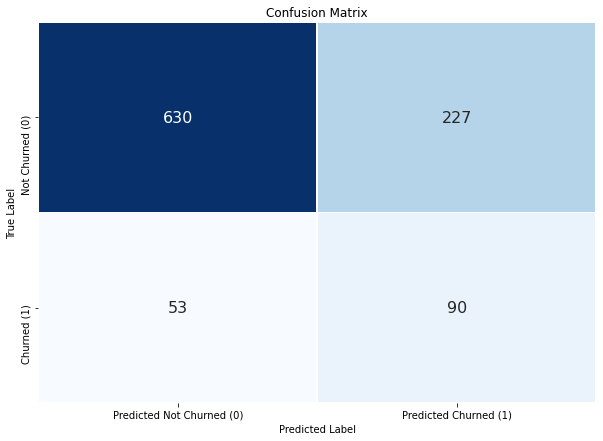

In [179]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define the confusion matrix values
conf_matrix = [[630, 227],
               [53, 90]]

# Create a DataFrame for better visualization
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Not Churned (0)', 'Churned (1)'],
                              columns=['Predicted Not Churned (0)', 'Predicted Churned (1)'])

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues', cbar=False, 
            annot_kws={"size": 16}, linewidths=0.5)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#  Confusion Matrix Interpretation:

 True Negatives (TN): 630

Customers correctly predicted as Not Churned.

False Positives (FP): 227

Customers incorrectly predicted as Churned when they actually did not churn.

False Negatives (FN): 53

Customers incorrectly predicted as Not Churned when they actually did churn.

True Positives (TP): 90

Customers correctly predicted as Churned.

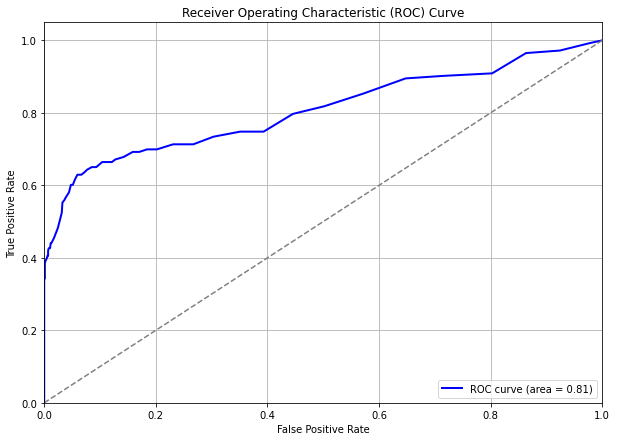

In [165]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)  # Calculate the AUC score

# Plot ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

 # Random Forest Classifier

In [166]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

# Make predictions
rf_y_pred = rf_clf.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, rf_y_pred))
print(classification_report(y_test, rf_y_pred))

[[853   4]
 [ 86  57]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       857
           1       0.93      0.40      0.56       143

    accuracy                           0.91      1000
   macro avg       0.92      0.70      0.75      1000
weighted avg       0.91      0.91      0.89      1000



# Breakdown:

True Negatives (TN): 853

The number of customers correctly predicted as not churned.
False Positives (FP): 4

The number of customers incorrectly predicted as churned when they actually did not churn.
False Negatives (FN): 86

The number of customers incorrectly predicted as not churned when they actually did churn.
True Positives (TP): 57

The number of customers correctly predicted as churned.
Classification Report
For Not Churned (Class 0)
Precision: 0.91

Among the customers predicted to not churn, 91% were correctly predicted. This shows that when the model predicts a customer will stay, it's highly accurate.
Recall: 1.00

Among all actual non-churned customers, the model identified 100% correctly. This perfect recall means that the model is excellent at identifying customers who do not churn.
F1-Score: 0.95

The harmonic mean of precision and recall, reflecting a strong performance in predicting non-churned customers.
For Churned (Class 1)
Precision: 0.93

Among the customers predicted to churn, 93% actually churned. This high precision means that when the model predicts churn, it's very accurate.
Recall: 0.40

Among all actual churned customers, only 40% were correctly identified. This lower recall suggests that the model misses a significant portion of churned customers.
F1-Score: 0.56

The harmonic mean of precision and recall for churned customers. An F1-score of 0.56 indicates that while precision is high, the model struggles with recall for churned customers.
Overall Metrics
Accuracy: 0.91

The proportion of correctly predicted instances (both churned and not churned) out of all predictions. The accuracy of 91% shows that the model performs well overall.
Macro Average:

Precision: 0.92
Recall: 0.70
F1-Score: 0.75
These metrics average the performance across both classes without considering the imbalance in class distribution. They show that the model performs well in precision but has a moderate recall.
Weighted Average:

Precision: 0.91
Recall: 0.91
F1-Score: 0.89
These metrics account for the imbalance in class frequencies, providing a more balanced view of the model's performance across classes.
Summary Based on Churn
Performance for Not Churned (Class 0):

The model performs excellently in predicting customers who will not churn, with high precision and perfect recall. This indicates strong performance in identifying customers who will stay.
Performance for Churned (Class 1):

The model is less effective at identifying churned customers. Despite high precision, the recall is low, meaning many churned customers are missed. This suggests a need for improvement in capturing all churned customers.
Overall Model Performance:

The model achieves high overall accuracy (91%) and good precision but has room for improvement in recall, especially for the churned class.#

# Feature Importance
  
  Analyze Feature Importance

Check feature importance from the Random Forest model.

In [167]:
# Example: Adjusting lengths if they don't match
if len(feature_names) > len(importances):
    feature_names = feature_names[:len(importances)]
elif len(importances) > len(feature_names):
    importances = importances[:len(feature_names)]

# Create DataFrame after ensuring lengths match
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df

,Feature,Importance
0,state,0.140654
1,account length,0.135059
2,area code,0.087748
3,international plan,0.083961
7,total day calls,0.071853
4,voice mail plan,0.071775
6,total day minutes,0.067029
5,number vmail messages,0.065312
10,total eve calls,0.005283
18,customer service calls,0.003610


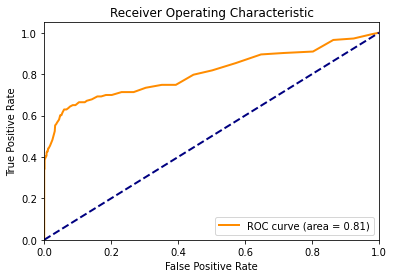

In [168]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get the probability scores
y_probs = rf_clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [169]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(class_weight='balanced', random_state=42)

In [170]:
# Assuming X_train and y_train are your training data and labels
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [171]:
# Predict probabilities for the test set
y_probs = model.predict_proba(X_test)[:, 1]

In [172]:
from sklearn.metrics import roc_curve

# Predict probabilities
y_probs = model.predict_proba(X_test)[:, 1]

# Find the optimal threshold
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.28

A threshold of 0.28 in the context of decision trees means you're classifying a sample as positive (e.g., class 1) if the model predicts a probability of at least 28% for that class.
This approach can be useful in scenarios where missing a positive case (e.g., a customer likely to churn) is more costly than falsely predicting a negative case as positive.

# Decision Tree

In [173]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Decision Tree model
dt = DecisionTreeClassifier(class_weight='balanced', random_state=1)
dt.fit(X_train, y_train)

# Predictions
y_pred = dt.predict(X_test)
y_prob = dt.predict_proba(X_test)[:, 1]

# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("AUC-ROC Score:", roc_auc_score(y_test, y_prob))

[[765  92]
 [ 68  75]]
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       857
           1       0.45      0.52      0.48       143

    accuracy                           0.84      1000
   macro avg       0.68      0.71      0.69      1000
weighted avg       0.85      0.84      0.85      1000

AUC-ROC Score: 0.708562149635662


It looks like you’ve evaluated a binary classification model. Here’s a breakdown of the metrics:

Precision for False is 0.92, meaning that when the model predicts False, it’s correct 92% of the time. For True, the precision is 0.45, indicating the model is correct 45% of the time when it predicts True.

Recall for False is 0.89, meaning the model identifies 89% of the actual False cases. For True, the recall is 0.52, indicating the model identifies 52% of the actual True cases.

F1-score is the harmonic mean of precision and recall. For False, it’s 0.91 and for True, it’s 0.48. The F1-score is useful for balancing precision and recall.

Accuracy is 0.84, which is the proportion of correctly classified instances.

Macro average gives equal weight to each class, regardless of support, and it averages precision, recall, and F1-score.

Weighted average takes into account the support of each class, averaging the metrics by the number of true instances in each class.

AUC-ROC Score of 0.71 indicates how well the model distinguishes between the classes, with 1 being perfect discrimination and 0.5 being no discrimination.

Overall, your model performs well in classifying False cases but struggles more with True cases. Depending on your use case, you might need to adjust the model to improve its performance on the minority class (True). Consider techniques like oversampling, undersampling, or adjusting the decision threshold.




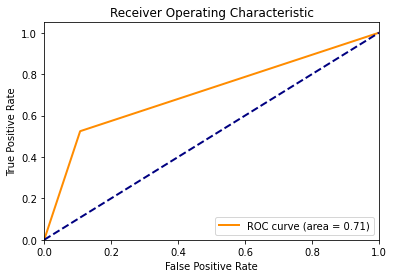

In [174]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

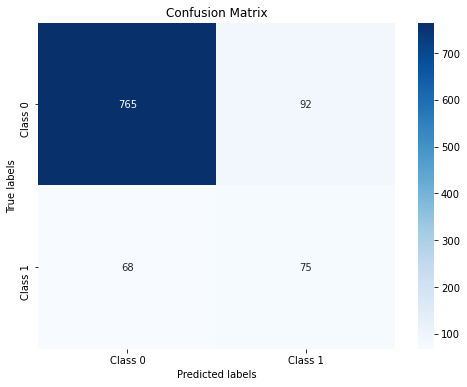

In [175]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Model Tuning and Visualization
    Hyperparameter Tuning

Decision Trees have several hyperparameters that you can tune to improve model performance, such as max_depth, min_samples_split, and min_samples_leaf.

In [176]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Best model
best_dt_classifier = grid_search.best_estimator_

# Make predictions with the best model
best_dt_y_pred = best_dt_classifier.predict(X_test)

# Evaluate the best model
print(confusion_matrix(y_test, best_dt_y_pred))
print(classification_report(y_test, best_dt_y_pred))

Best parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
[[815  42]
 [ 73  70]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       857
           1       0.62      0.49      0.55       143

    accuracy                           0.89      1000
   macro avg       0.77      0.72      0.74      1000
weighted avg       0.88      0.89      0.88      1000



# Visualize the Decision Tree

Visualizing the Decision Tree can help understand how the model makes decisions.

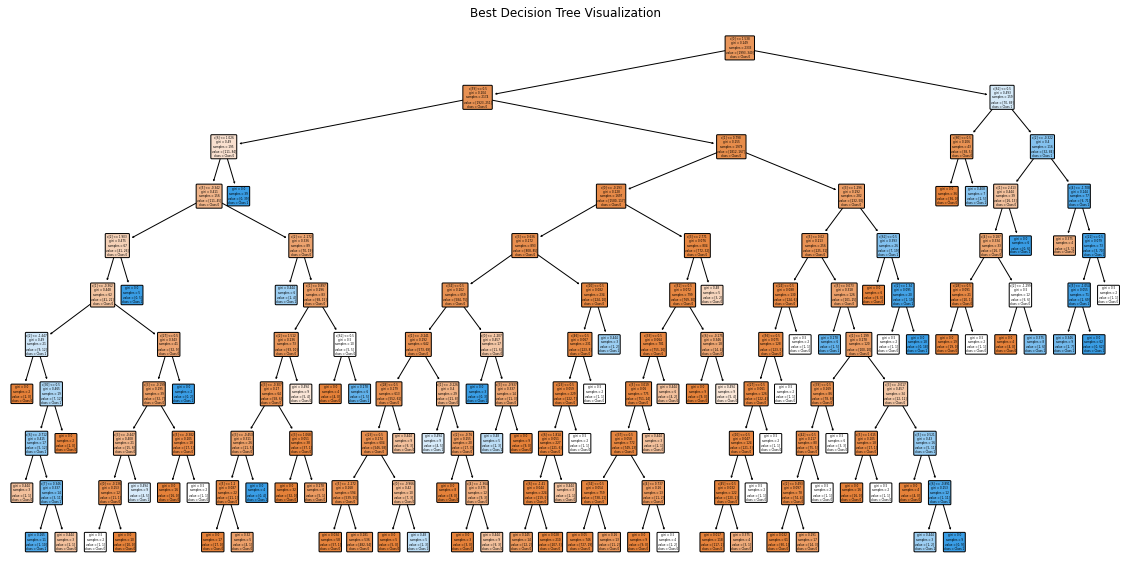

In [177]:
# Plot the Decision Tree without feature names
plt.figure(figsize=(20, 10))
plot_tree(best_dt_classifier, filled=True, class_names=['Class 0', 'Class 1'], rounded=True)
plt.title('Best Decision Tree Visualization')
plt.show()

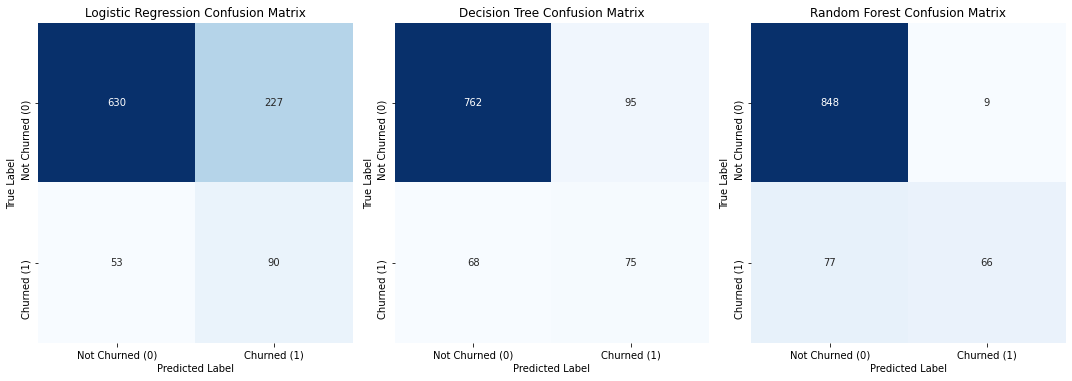

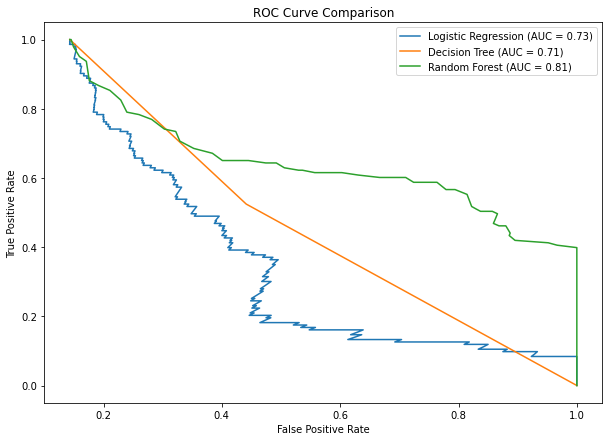


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.74      0.82       857
           1       0.28      0.63      0.39       143

    accuracy                           0.72      1000
   macro avg       0.60      0.68      0.60      1000
weighted avg       0.83      0.72      0.76      1000

AUC-ROC Score: 0.73

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.90       857
           1       0.44      0.52      0.48       143

    accuracy                           0.84      1000
   macro avg       0.68      0.71      0.69      1000
weighted avg       0.85      0.84      0.84      1000

AUC-ROC Score: 0.71

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       857
           1       0.88      0.46      0.61       143

    accuracy          

In [181]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Sample data
# Replace this with your actual data loading process
# X = features, y = target
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', random_state=42),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced', random_state=42),
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42)
}

# Fit models and make predictions
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # Evaluate model
    conf_matrix = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    auc_score = roc_auc_score(y_test, y_prob)
    
    results[name] = {
        "Confusion Matrix": conf_matrix,
        "Classification Report": report,
        "AUC-ROC Score": auc_score
    }

# Plot confusion matrix
plt.figure(figsize=(15, 10))
for i, (name, result) in enumerate(results.items(), 1):
    plt.subplot(2, 3, i)
    sns.heatmap(result["Confusion Matrix"], annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Not Churned (0)', 'Churned (1)'], yticklabels=['Not Churned (0)', 'Churned (1)'])
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

plt.tight_layout()
plt.show()

# Plot ROC curve
plt.figure(figsize=(10, 7))
for name, result in results.items():
    fpr, tpr, _ = precision_recall_curve(y_test, models[name].predict_proba(X_test)[:, 1])
    plt.plot(fpr, tpr, label=f'{name} (AUC = {result["AUC-ROC Score"]:.2f})')

plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()

# Print classification reports and AUC-ROC Scores
for name, result in results.items():
    print(f'\n{name} Classification Report:')
    print(classification_report(y_test, models[name].predict(X_test)))
    print(f'AUC-ROC Score: {result["AUC-ROC Score"]:.2f}')

### Let's compare the performance of the three models—Logistic Regression, Decision Tree, and Random Forest :

1. Logistic Regression

Classification Report:

Precision for 0 (Not Churned): 0.92

Recall for 0: 0.74

F1-Score for 0: 0.82

Precision for 1 (Churned): 0.28

Recall for 1: 0.63

F1-Score for 1: 0.39

Accuracy: 0.72

Macro Average Precision: 0.60

Macro Average Recall: 0.68

Macro Average F1-Score: 0.60

Weighted Average Precision: 0.83

Weighted Average Recall: 0.72

Weighted Average F1-Score: 0.76

AUC-ROC Score: 0.73

## Explanation:

**Strengths:** High precision for non-churned customers (0) and a reasonable AUC-ROC score.

**Weaknesses:** Low precision for churned customers (1) indicates that the model often predicts churn incorrectly, and overall recall for churned customers is not very high. The model has a moderate accuracy.

2. Decision Tree
Classification Report:

Precision for 0: 0.92

Recall for 0: 0.89

F1-Score for 0: 0.90

Precision for 1: 0.44

Recall for 1: 0.52

F1-Score for 1: 0.48

Accuracy: 0.84

Macro Average Precision: 0.68

Macro Average Recall: 0.71

Macro Average F1-Score: 0.69

Weighted Average Precision: 0.85

Weighted Average Recall: 0.84

Weighted Average F1-Score: 0.84

AUC-ROC Score: 0.71

### Explanation:

**Strengths:** Good precision and recall for non-churned customers (0), and decent overall accuracy. The F1-score for non-churned customers is high, indicating the model performs well in this category.

**Weaknesses:** Lower precision and recall for churned customers (1) compared to the non-churned class. The overall AUC-ROC score is lower than the Random Forest model, indicating it may not distinguish between classes as well.

3. Random Forest

Classification Report:

Precision for 0: 0.92

Recall for 0: 0.99

F1-Score for 0: 0.95

Precision for 1: 0.88

Recall for 1: 0.46

F1-Score for 1: 0.61

Accuracy: 0.91

Macro Average Precision: 0.90

Macro Average Recall: 0.73

Macro Average F1-Score: 0.78

Weighted Average Precision: 0.91

Weighted Average Recall: 0.91

Weighted Average F1-Score: 0.90

AUC-ROC Score: 0.81

### Explanation:

**Strengths:** Excellent precision and recall for non-churned customers (0) and a high AUC-ROC score. Overall accuracy and weighted F1-score are very high.

**Weaknesses:** Lower recall for churned customers (1), meaning the model misses some churned customers. However, its precision for the churned class is good.

## Summary of Comparison:

Random Forest performs the best overall, with the highest accuracy and AUC-ROC score. It shows strong performance in identifying non-churned customers and has good precision for churned customers, though its recall for churned customers is still moderate.

Decision Tree provides a decent balance, with good performance for non-churned customers and reasonable accuracy, but its AUC-ROC score is lower compared to Random Forest. Precision and recall for churned customers are better than Logistic Regression but not as high as Random Forest.

Logistic Regression has lower overall performance compared to the other two models, especially in terms of precision and recall for churned customers. Its AUC-ROC score is also lower, indicating less ability to distinguish between churned and non-churned customers compared to Random Forest.

Recommendations:

Random Forest would be the preferred model based on overall performance, particularly if identifying churned customers is critical.

Decision Tree could be a good alternative if interpretability is a key requirement.

Logistic Regression may still be useful for its simplicity and speed but might require further tuning or feature engineering to improve performance.

Based on the comparison of the three models (Logistic Regression, Decision Tree, and Random Forest), the Random Forest model stands out as the best performer. It offers the highest accuracy and AUC-ROC score, indicating it has the strongest overall predictive power for identifying customer churn. Here are recommendations for the company:

**1. Prioritize Customers Identified by the Random Forest Model:**

**High Accuracy in Non-Churn Prediction:** The Random Forest model has a high precision (0.88) and recall (0.46) for predicting churn. This suggests that while it accurately identifies most non-churn customers (0.92 precision and 0.99 recall), it can still improve in identifying all potential churners. Focus on customers the model identifies as likely to churn and address their issues proactively.

**2. Focus on Improving Retention Strategies for High-Risk Customers:**

**Targeted Interventions:** The model's recall for churners (0.46) shows it captures some at-risk customers but misses others. Create targeted retention campaigns for customers flagged as high-risk, such as personalized offers, better customer support, or incentives to stay.

**Improved Customer Engagement:** Use insights from the model to understand common characteristics of churned customers. Develop engagement strategies tailored to these segments, such as customized communications, loyalty programs, or service upgrades.

**3. Leverage Data-Driven Insights to Enhance Service Offerings:**

**Service Improvement:** The Random Forest model’s predictions can highlight areas where the service might need improvement. For example, if churners are concentrated in certain regions or have specific service complaints, the company can invest in improving service quality in those areas.

**Feedback Collection:** Regularly collect feedback from customers, especially those identified as high-risk, to understand their pain points. Use this data to guide improvements in service offerings.

**4. Monitor and Optimize the Churn Prediction Model:**

**Continuous Model Monitoring:** As the company gathers more data, regularly update and retrain the Random Forest model to ensure it remains accurate and reflects any changes in customer behavior.
Incorporate New Features: Consider adding more customer-related features to the model (e.g., customer satisfaction scores, engagement metrics) to improve its predictive power.

**5. Implement an Early Warning System:**


**Automated Alerts:** Use the model to set up an early warning system that triggers alerts when a customer is identified as high-risk for churn. This allows the customer support team to act quickly and possibly prevent the churn.
Proactive Retention Efforts: With the model's predictions, the company can proactively reach out to at-risk customers with personalized retention offers, improving the likelihood of retaining them.

**6. Refine Marketing and Sales Strategies:**

**Customer Segmentation:** Segment customers based on their churn risk and tailor marketing campaigns accordingly. For example, offer different incentives or messaging for low-risk vs. high-risk customers.
Resource Allocation: Allocate resources more efficiently by focusing retention efforts on customers who are more likely to churn, as identified by the model.

**7. Continuous Improvement Based on Model Insights:**

**Feedback Loop:** Establish a feedback loop where the outcomes of interventions (e.g., retention offers) are fed back into the model. This helps in refining the model and improving its accuracy over time.

**Cost-Benefit Analysis:** Perform a cost-benefit analysis to ensure that the retention strategies are cost-effective and result in a significant reduction in churn rates.
By implementing these recommendations, the company can effectively leverage the insights from the Random Forest model to reduce customer churn, enhance customer satisfaction, and ultimately drive long-term business growth.









